# <u style = "color: blue;"><p style = "color: blue;"> ***Regression Model*** </p></u> 

### Imports

In [30]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error


### Making a grid for multiple models to evaluate them at once

In [31]:
models = {
    'Ridge': (Ridge(random_state=42), {
        'alpha': [0.01, 0.1, 1, 10, 100]
    }),
    'Lasso': (Lasso(random_state=42), {
        'alpha': [0.001, 0.01, 0.1, 1, 10]
    }),
    'Elastic': (ElasticNet(random_state=42), {
        "alpha": [0.001, 0.01, 0.1, 1, 10],
        "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
    }),
    'SVR':(SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1), {
    }),
    'RF': (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, None]
    }),
    
    'KNN': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }),
    'XGB': (XGBRegressor(eval_metric='logloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
    })
}


### Loading the dataset

In [32]:
df = pd.read_csv('clean_data.csv')

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Age', 'Age_log'], axis=1)
y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X_train.columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

### Checking the performance of all models

In [34]:
best_score = 0
best_model = None
best_name = None

for name, (model, params) in models.items():
    print(f"\n{name} Processing...")
    grid = GridSearchCV(model, param_grid=params, scoring='r2', n_jobs=-1)
    grid.fit(X_train_encoded, y_train)
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Best Score: {grid.best_score_}")
    
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_name = name

print(f"\nBest Model: {best_name} with R2 = {best_score}")


Ridge Processing...
Ridge Best Params: {'alpha': 100}
Ridge Best Score: 0.07090437207291325

Lasso Processing...
Lasso Best Params: {'alpha': 0.1}
Lasso Best Score: 0.06445819816270804

Elastic Processing...
Elastic Best Params: {'alpha': 0.1, 'l1_ratio': 0.3}
Elastic Best Score: 0.07078298709601656

SVR Processing...
SVR Best Params: {}
SVR Best Score: 0.013222759990994227

RF Processing...
RF Best Params: {'max_depth': 7, 'n_estimators': 100}
RF Best Score: 0.040791720357292525

KNN Processing...
KNN Best Params: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
KNN Best Score: -0.024845999894550785

XGB Processing...
XGB Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGB Best Score: 0.06743408441543579

Best Model: Ridge with R2 = 0.07090437207291325


### Evaluating the model

R2_Score:  0.05189627534332486
MAE:  5.4122502689239536
RMSE:  7.042636876899095


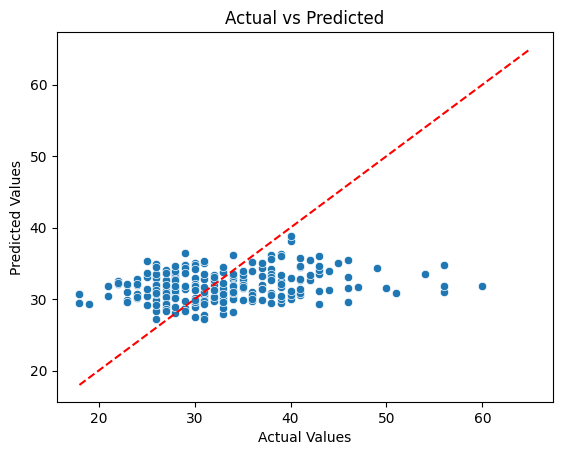

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = best_model.predict(X_test_encoded)

print('R2_Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', root_mean_squared_error(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


### Exporting the model

In [36]:
import joblib
joblib.dump(best_model, 'regression_model.pkl')

['regression_model.pkl']

### Conclusion:-

The Ridge model gave the best results, this can be inferred by comparing the scores of all models.


R2_Score:  0.05189627534332486


MAE:  5.4122502689239536


RMSE:  7.042636876899095
